In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('F:/HK1-N4/TLCN/DataSet/Trafic_Chines')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
#lưu trữ dữ liệu và nhãn 
data = [] #data chứa input
labels = [] #labels chứa output

classes = 43

cur_path = os.getcwd()

In [3]:
#trả về thử mục đang đứng
cur_path

'F:\\HK1-N4\\TLCN\\DataSet\\Trafic_Chines'

In [4]:
model_path = os.getcwd()+"//model"

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))#dẫn đường dẫn tới thư mục train
    images = os.listdir(path)#lấy ra danh sách các thư mực trong tập train
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [6]:
#khởi tạo mảng data, label
data = np.array(data)
labels = np.array(labels)

In [7]:
np.save('F:/HK1-N4/TLCN/DataSet/Trafic_Chines/training/data',data)
np.save('F:/HK1-N4/TLCN/DataSet/Trafic_Chines/training/target',labels)

In [8]:
#tập training và testing được lưu lại ở dạng binary khi xử lý xong, việc lưu này thuận tiện cho việc đọc nhiều lần
data=np.load('F:/HK1-N4/TLCN/DataSet/Trafic_Chines/training/data.npy')
labels=np.load('F:/HK1-N4/TLCN/DataSet/Trafic_Chines/training/target.npy')

In [9]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [10]:
data.shape


(39209, 30, 30, 3)

In [11]:
#sử dụng train_test_split để chia tập thành train và test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [13]:


y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Dropout(rate=0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
981/981 [==============================] - 129s 132ms/step - loss: 2.0117 - accuracy: 0.4632 - val_loss: 0.6689 - val_accuracy: 0.8009
Epoch 2/2
981/981 [==============================] - 128s 131ms/step - loss: 0.8686 - accuracy: 0.7400 - val_loss: 0.3006 - val_accuracy: 0.9161


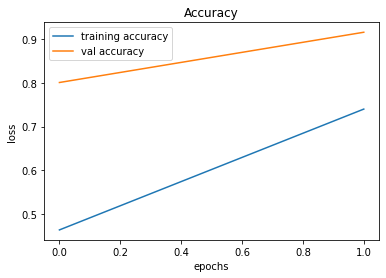

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

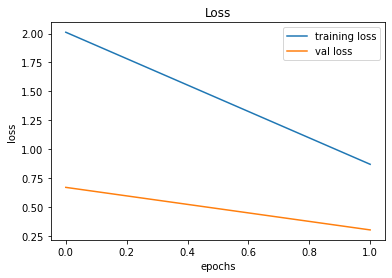

In [19]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [21]:
X_test, label = testing('Test.csv')

In [22]:
Y_pred = model.predict_classes(X_test)
Y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([16,  1, 38, ...,  3,  8, 10], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.8657165479018211


In [24]:
model.save("F:/HK1-N4/TLCN/DataSet/Trafic_Chines/training/TSR.h5")

In [37]:
import os
os.chdir(r'F:/HK1-N4/TLCN/DataSet/Trafic_Chines')
from keras.models import load_model
model = load_model('F:/HK1-N4/TLCN/DataSet/Trafic_Chines/training/model.h5')

In [38]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  No passing veh over 3.5 tons


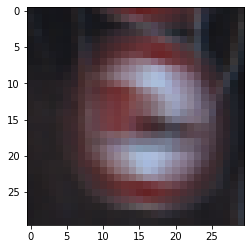

In [54]:
plot,prediction = test_on_img(r'F:/HK1-N4/TLCN/DataSet/Trafic_Chines\Test\00216.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

In [60]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [61]:
predictions = probability_model.predict(X_test)

In [62]:
predictions[0]

array([0.02236221, 0.02236221, 0.02236221, 0.02236221, 0.02236221,
       0.02236221, 0.02236221, 0.02236221, 0.02236221, 0.02236221,
       0.02236221, 0.02236221, 0.02236221, 0.02236221, 0.02236221,
       0.02236221, 0.06078678, 0.02236221, 0.02236221, 0.02236221,
       0.02236221, 0.02236221, 0.02236221, 0.02236221, 0.02236221,
       0.02236221, 0.02236221, 0.02236221, 0.02236221, 0.02236221,
       0.02236221, 0.02236221, 0.02236221, 0.02236221, 0.02236221,
       0.02236221, 0.02236221, 0.02236221, 0.02236221, 0.02236221,
       0.02236221, 0.02236221, 0.02236221], dtype=float32)